# Exercise 1

In [ ]:
from google.colab import files
import pandas as pd 
import io
import sklearn

uploaded = files.upload()
wine = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']), sep = ';')
wine = wine[0:1000]
wine

Saving winequality-white.csv to winequality-white.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.8,0.27,0.34,1.60,0.046,27.0,154.0,0.9927,3.05,0.45,10.5,6
996,6.0,0.26,0.34,1.30,0.046,6.0,29.0,0.9924,3.29,0.63,10.4,5
997,6.1,0.24,0.27,9.80,0.062,33.0,152.0,0.9966,3.31,0.47,9.5,6
998,8.0,0.24,0.30,17.45,0.056,43.0,184.0,0.9997,3.05,0.50,9.2,6


We upload winequality-white.csv.  
We upload it in the pandas dataframe format with ; separator.  
We shuffle the wine data set.  
We take only the first 1000 elements.  

# Exercise 2

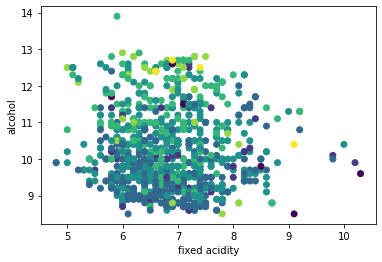

In [ ]:
import matplotlib.pyplot as plt

plt.scatter (wine['fixed acidity'],
             wine['alcohol'],
             c=wine['quality'],
             cmap='viridis')
plt.xlabel("fixed acidity")
plt.ylabel("alcohol")
plt.show()

We can see that the classes are not linearly separable, causing many ambiguous points.

# Exercise 3

In [ ]:
from keras.utils import to_categorical

X = wine.iloc[:,0:11]
y = wine.iloc[:,11]
X = X.values
y = y.values
y = to_categorical(y)

We get the first 11 columns of the wine dataset as X and the final column as y.  
Then we convert the dataframe to a matrix using X.values and y.values.  
Finally we convert y values to the categorical types.

# Exercise 4

In [ ]:
n_train = int(0.8*(len(wine)))
trainX , testX = X[:n_train , :], X[n_train:, :] 
trainy, testy = y[:n_train], y[n_train:]
print('X:', trainX.shape, testX.shape)
print('y:', trainy.shape, testy.shape)

X: (800, 11) (200, 11)
y: (800, 10) (200, 10)


We divide the data set to train and test sets by selecting the first 80% of elements as train and the rest as the test set.  
We check the trainX, testX, trainy and testy shapes and we see that they are coherent.

# Exercise 5

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_dim = X.shape[1]),
    keras.layers.Dense(y.shape[1], activation='softmax')
    ])

We define a simple multi layer perceptron (MLP) model that expects 11
input variables from the wine dataset, has a single hidden layer with 50 nodes and an output layer with 10 nodes to predict the probability for each of the ten classes.  
Nodes in the hidden layer use the rectified linear activation function (ReLU), whereas nodes in the output layer use the softmax activation function.

# Exercise 6

In [ ]:
from keras.optimizers import SGD

lrate = 0.01
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate = lrate), metrics=['accuracy'])

We use the stochastic gradient descent optimizer and a learning rate of 0.01.  
The model will be trained to minimize cross entropy.

# Exercise 7

In [ ]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1)

Epoch 1/200
25/25 [==============================] - 0s 4ms/step - loss: 1.2969 - accuracy: 0.4175 - val_loss: 1.5317 - val_accuracy: 0.3100
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2803 - accuracy: 0.4437 - val_loss: 1.4867 - val_accuracy: 0.3300
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 1.4673 - accuracy: 0.3925 - val_loss: 1.4651 - val_accuracy: 0.3500
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2799 - accuracy: 0.4225 - val_loss: 1.4712 - val_accuracy: 0.3350
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 1.3177 - accuracy: 0.4125 - val_loss: 1.4747 - val_accuracy: 0.3550
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 1.3334 - accuracy: 0.4100 - val_loss: 1.4765 - val_accuracy: 0.3500
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.2802 - accuracy: 0.4087 - val_loss: 1.4931 - val_accuracy: 0.3500
Epoch 8/200
2

We fit the model for 200 training epochs, found with a little trial and error, and the test set will be used as the validation dataset so we can get an idea of the generalization error of the model during training.

# Exercise 8

Text(0.5, 1.0, 'lrate =0.01')

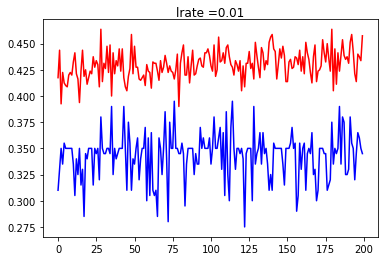

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train', color='r')
plt.plot(history.history['val_accuracy'], label='test', color='b')
plt.title('lrate=' + str(lrate), pad=-50)

We plot the accuracy of the model on the train and test sets over the training epochs.

# Exercise 9

In [ ]:
def fit_model(trainX, trainy, testX, testy, lrate):
  model = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_dim = X.shape[1]),
    keras.layers.Dense(y.shape[1], activation='softmax')
    ])
  model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate = lrate), metrics=['accuracy'])
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
  plt.plot(history.history['accuracy'], label='train', color='r')
  plt.plot(history.history['val_accuracy'], label='test', color='b')
  plt.title('lrate =' + str(lrate), pad=-50)

We write a function named fit_model(trainX, trainy, testX, testy,
lrate) that ties the exercises 5 to 8 together.  
In general, it will fit a model and plot its performance given the train and test datasets as well as a specific learning rate to evaluate.

# Exercise 10

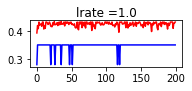

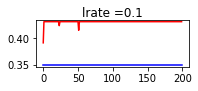

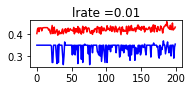

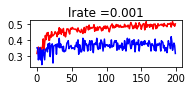

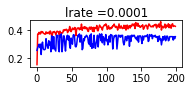

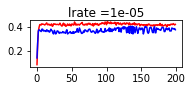

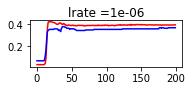

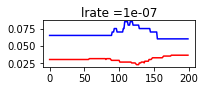

In [ ]:
learning_rates = [1E-0 , 1E-1 , 1E-2 , 1E-3 , 1E-4 , 1E-5 , 1E-6 , 1E-7]
for i in range(len(learning_rates)):
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  fit_model(trainX, trainy, testX, testy, learning_rates[i])
  plt.show ()

We evaluate learning rates on a logarithmic scale from 1E−0 (1.0) to 1E−7 (0.000001) and create line plots for each learning rate by calling the fit_model() function.  
Classification accuracy on the training dataset is marked in blue, whereas accuracy on the test dataset is marked in orange.

# Exercise 11

In [ ]:
def fit_model(trainX, trainy, testX, testy, momentum):
  model = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_dim = X.shape[1]),
    keras.layers.Dense(y.shape[1], activation='softmax')
    ])
  model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=momentum), metrics=['accuracy'])
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
  plt.plot(history.history['accuracy'], label='train', color='r')
  plt.plot(history.history['val_accuracy'], label='test', color='b')
  plt.title('momentum=' + str(momentum), pad=-50)

We modify the fit_model(trainX, trainy, testX, testy, momentum) function to take a "momentum" argument instead of a learning rate argument, that can be used in the configuration of the SGD
class and reported on the resulting plot.  
And we keep the learning rate as our best parameter of the exercise 10.

# Exercise 12 

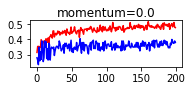

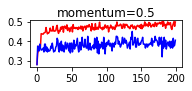

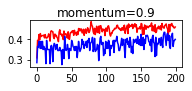

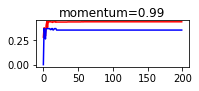

In [ ]:
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  fit_model(trainX, trainy, testX, testy, momentums[i])
  plt.show ()

We create line plots for each momentum by calling the fit_model() function using the modified fit_model() function. 

# Exercise 13

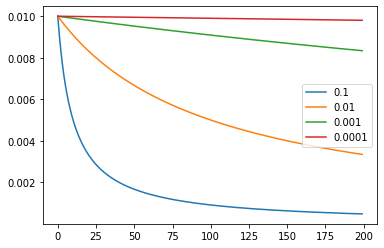

In [ ]:
def decay_lrate(initial_lrate, decay, iteration):
  return initial_lrate * (1.0 / (1.0 + decay * iteration))

decays = [1E-1, 1E-2, 1E-3 , 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays :
  lrates = [decay_lrate(lrate, decay, i) for i in range (n_updates )]
  plt.plot(lrates, label=str(decay))
plt.legend()
plt.show()

We implement a learning rate decay function for three input variables initial rate, decay and iteration.  
We create a line plot showing learning rates over updates for different decay values.  
After checking results, we can seen that in all cases, the learning rate starts at the initial value of 0.01.  
And a small decay value of 1E−4 has almost no effect, whereas a large decay value of 1E−1 has a dramatic effect.  
We can see that the change to the learning rate is not linear.  
We can also see that changes to the learning rate are dependent on the batch size, after which an update is performed.


# Exercise 14

In [ ]:
def fit_model(trainX, trainy, testX, testy, decay):
  model = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_dim = X.shape[1]),
    keras.layers.Dense(y.shape[1], activation='softmax')
    ])
  model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, decay=decay), metrics=['accuracy'])
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
  plt.plot(history.history['accuracy'], label='train', color='r')
  plt.plot(history.history['val_accuracy'], label='test', color='b')
  plt.title('decay=' + str(decay), pad=-50)

We modify the fit_model() function to take a 'decay' argument which can be used to configure decay for SGD class.

# Exercise 15

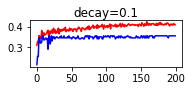

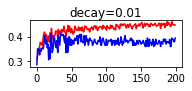

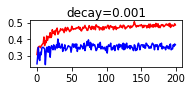

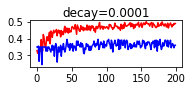

In [ ]:
decays = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decays)):
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  fit_model(trainX, trainy, testX, testy, decays[i])
  plt.show ()

We create line plots for each decay by calling the fit_model() function using the modified fit_model() function. 

# Exercise 16

In [ ]:
def fit_model(trainX, trainy, testX, testy, optimizer):
  model = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_dim = X.shape[1]),
    keras.layers.Dense(y.shape[1], activation='softmax')
    ])
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
  plt.plot(history.history['accuracy'], label='train', color='r')
  plt.plot(history.history['val_accuracy'], label='test', color='b')
  plt.title('optimizer=' + str(optimizer), pad=-50)

We update the fit_model(trainX, trainy, testX, testy, optimizer) function to take the name of an optimization algorithm to evaluate, which can be specified to the “optimizer” argument when the MLP model is compiled.  
The default parameters for each method will then be used.

# Exercise 17

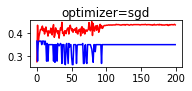

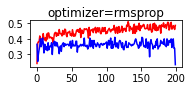

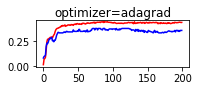

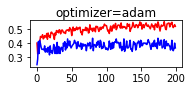

In [ ]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(optimizers)):
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  fit_model(trainX, trainy, testX, testy, optimizers[i])
  plt.show ()

We explore the three methods of RMSprop, AdaGrad and Adam and compare their behavior to simple stochastic gradient descent with a static learning rate.